Here is a brief description of the data:

  - "_x" files contain the xyz accelerometers and xyz gyroscope measurements from the lower limb.
  - "_x_time" files contain the time stamps for the accelerometer and gyroscope measurements. The units are in seconds and the sampling rate is 40 Hz.
  - "_y" files contain the labels. (0) indicates standing or walking in solid ground, (1) indicates going down the stairs, (2) indicates going up the stairs, and (3) indicates walking on grass.
  - "_y_time" files contain the time stamps for the labels. The units are in seconds and the sampling rates is 10 Hz.


The data set is imbalanced. Here are some suggestions for handling imbalance:

  1. Make sure you create a validation set that is also balanced in order to better represent the type of testing data you will get.
  2. You can modify your loss function to include weights that compensate for the imbalance distributions. A quick search online would give you some hints on how to do this.
  3. When doing data augmentation, you can make sure your training data is balanced by getting more replications (with some deformation / noise) for those classes that have fewer samples.
  4. You can also apply a subsampling approach when creating your batches which includes all the data for the smaller datasets but selects a smaller proportion from the classes with most instances (in order to keep the number per class about the same).

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
imu = pd.read_csv('training_data/subject_001_01__x.csv', names=['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z'])
imu_t = pd.read_csv('training_data/subject_001_01__x_time.csv', names=['time'])
ann = pd.read_csv('training_data/subject_001_01__y.csv', names=['labels'])
ann_t = pd.read_csv('training_data/subject_001_01__y_time.csv', names=['time'])

In [11]:
imu.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z
0,4.435275,8.196063,2.974488,0.014215,-0.039157,-0.016744
1,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345
2,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159
3,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223
4,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111


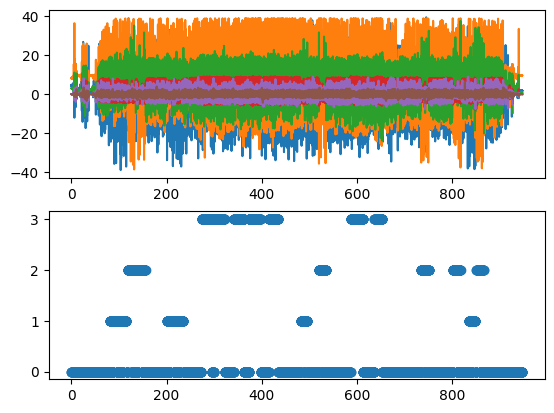

In [25]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(imu_t, imu)
axs[1].scatter(ann_t, ann)
plt.show()

% Simple script illustrating how to visualize some of the data

% Loading sample data
imu = csvread('TrainingData/subject_001_01__x.csv');
imu_t = csvread('TrainingData/subject_001_01__x_time.csv');
ann = csvread('TrainingData/subject_001_01__y.csv');
ann_t = csvread('TrainingData/subject_001_01__y_time.csv');

% Plotting data
figure(2), clf;
h(1) = subplot(2,1,1); plot(imu_t,imu);
h(2) = subplot(2,1,2); plot(ann_t,ann);
linkaxes(h,'x');